In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix, balanced_accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [3]:
uk_books = pd.read_csv('uk_books.csv')
predictors = ['listingIsTopRated', 'sellerFeedbackScore', 'sellerPositivePercent', 'sellerIsTopRated', 
              'endAtWeekend', 'endAtEvening', 'length', 'isBroken', 'isUsed', 'isSet', 'freeShipping']

X = uk_books.loc[:,predictors]
y = uk_books.loc[:,'isSold']

In [6]:
model = GradientBoostingClassifier()
over = SMOTE()
under = RandomUnderSampler()
pipeline = Pipeline(steps=[("scaler", StandardScaler()), ('over', over), ('under', under), ('model', model)])
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

param_grid = {
    "over": ["passthrough", SMOTE(sampling_strategy=0.2, k_neighbors=1), SMOTE(sampling_strategy=0.5, k_neighbors=1),
            SMOTE(sampling_strategy=0.2, k_neighbors=3), SMOTE(sampling_strategy=0.5, k_neighbors=3),
            SMOTE(sampling_strategy=0.2, k_neighbors=5), SMOTE(sampling_strategy=0.5, k_neighbors=5)],
    "under": ["passthrough", RandomUnderSampler(sampling_strategy=0.5), RandomUnderSampler(sampling_strategy=0.8)],
    "model__n_estimators": [5, 30, 80, 150, 300],
    "model__max_depth": [1, 3, 7, 14, 20, 30]
}

search = GridSearchCV(pipeline, param_grid, scoring='balanced_accuracy', cv=cv, n_jobs=-1)
search.fit(X,y)

print(search.best_params_)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('over', SMOTE()),
                                       ('under', RandomUnderSampler()),
                                       ('model',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'model__max_depth': [1, 3, 7, 14, 20, 30],
                         'model__n_estimators': [5, 30, 80, 150, 300],
                         'over': ['passthrough',
                                  SMOTE(k_...1, sampling_strategy=0.2),
                                  SMOTE(k_neighbors=1, sampling_strategy=0.5),
                                  SMOTE(k_neighbors=3, sampling_strategy=0.2),
                                  SMOTE(k_neighbors=3, sampling_strategy=0.5),
                                  SMOTE(sampling_strategy=0.2),
                                  SMOTE(sampling_strategy=0.5)],
                         'under': ['passthrough',
                                   RandomUnderSampler(sampling_strategy=0.5),
                                   RandomUnderSampler(sampling_strategy=0.8)]},
             scoring='balanced_accuracy')

In [9]:
print(search.best_params_)
print(search.best_score_)

{'model__max_depth': 14, 'model__n_estimators': 300, 'over': SMOTE(k_neighbors=3, sampling_strategy=0.5), 'under': 'passthrough'}
0.6360596576668344


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

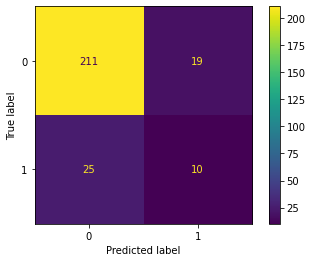

In [25]:
# over = SMOTE(sampling_strategy=0.5, k_neighbors=3)
# X_train_, y_train_ = over.fit_resample(X_train, y_train)

clf = GradientBoostingClassifier(max_depth=14, n_estimators=300)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

acc_one = accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot()

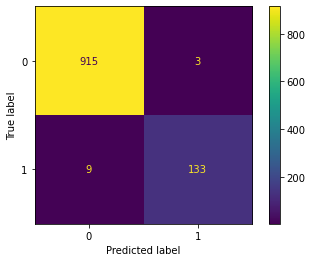

In [27]:
cm = confusion_matrix(y_train, clf.predict(X_train), labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot()